# Promotional Posts: Performance Forecast
Using Facebook Prophet, we will predict the performance of Promotional Posts based on 5 criteria: Impressions, URL Clicks, Likes, Retweets, Replies.

## Method
Facebook Prophet provides a model that can be trained on time series data in order to predict future outcomes. The Prophet object, requires a dataframe with a date column and a y (output) column. After plotting a forecast, it will detect and mark points of change in the plot.

## Steps
1. Clean/Re-label DataFrame and Isolate one criterion for the outcome column (i.e. "Impressions").
1. Instantiate Prophet Object (Model) with paramaters.
1. Train Model on historical DataFrame.
1. Produce Future DataFrame (future date inputs from which the Model will generate predictions).
1. Use Model to generate and plot predictions.
1. Show Changepoints (dashed lines indicate turning points in the time series).
1. Show components of forecast to better visualize the trend

### Import Dependencies

In [1]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Read Master CSV
goldie_df = pd.read_csv("goldie_master_cleaned_0314.csv")
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,2018-01-01 09:47:00+00:00,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,2018-01-02 18:11:00+00:00,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,2018-01-02 20:43:00+00:00,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,2018-01-03 00:51:00+00:00,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,2018-01-03 04:21:00+00:00,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11


In [3]:
#Changing Date/Time to "YYYY-MM-DD" format
goldie_df['year'] = pd.to_datetime(goldie_df['time']).dt.year.astype(str)
goldie_df['month'] = pd.to_datetime(goldie_df['time']).dt.month.astype(str)
goldie_df['day'] = pd.to_datetime(goldie_df['time']).dt.day.astype(str)

goldie_df['date'] = goldie_df[['year', 'month', 'day']].agg('-'.join, axis=1)
goldie_df = goldie_df.drop(columns = ["year", "month", "day"])
goldie_df = goldie_df.drop(columns = "time")

In [4]:
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6,2018-1-1
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-2
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-2
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7,2018-1-3
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11,2018-1-3


In [5]:
#Identify and Drop the Biggest Outlier
sample = goldie_df.sort_values(by=["impressions"], ascending=False)
sample.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
6258,6258,https://twitter.com/GoldieChan/status/11768922...,So excited that @Forbes shared my article on @...,1.0,608789.0,38345.0,0.062986,71.0,13.0,907.0,2077.0,753.0,0.0,459.0,0.0,1,34064,34064,2019-9-25
6779,6779,https://twitter.com/GoldieChan/status/11839781...,My next few 💚 talks &amp; livestreams:\n✨ #Vid...,2.0,283615.0,85.0,0.000300,11.0,1.0,22.0,10.0,0.0,1.0,11.0,0.0,0,491,29,2019-10-15
4798,4798,https://twitter.com/GoldieChan/status/11527092...,On a magical journey with #Funko Mira of @dark...,2.0,221055.0,6372.0,0.028825,42.0,3.0,339.0,172.0,80.0,18.0,230.0,0.0,0,5488,5488,2019-7-20
7426,7426,https://twitter.com/GoldieChan/status/11926178...,We’re on the red carpet for @OriginalFunko #Ho...,2.0,218574.0,3854.0,0.017632,16.0,11.0,216.0,387.0,17.0,55.0,268.0,0.0,0,2884,2884,2019-11-8
4797,4797,https://twitter.com/GoldieChan/status/11526773...,Always an absolute joy to collaborate with one...,2.0,209145.0,5912.0,0.028267,13.0,3.0,205.0,276.0,67.0,25.0,213.0,0.0,0,5110,5110,2019-7-20


In [6]:
goldie_df = goldie_df.drop([6258])

In [7]:
#Promotion Posts
promos = goldie_df.copy()
promos_df = promos[promos["Type"] == 1]
promos_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-2
10,10,https://twitter.com/GoldieChan/status/95000583...,Let's celebrate the Lunar #YearoftheDog with a...,1.0,368.0,4.0,0.010870,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0,0,0,2018-1-7
11,11,https://twitter.com/GoldieChan/status/95017896...,At @CES!! The green-haired Oprah of @LinkedIn ...,1.0,954.0,43.0,0.045073,2.0,0.0,10.0,5.0,1.0,0.0,3.0,0.0,0,115,22,2018-1-8
21,21,https://twitter.com/GoldieChan/status/95223729...,Let's visit the totally pinnable @Pinterest in...,1.0,352.0,3.0,0.008523,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-13
22,22,https://twitter.com/GoldieChan/status/95228875...,Some of the green murals in #ClarionAlley in S...,1.0,1203.0,12.0,0.009975,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,110,10,2018-1-13


## Forecast Impression Data for Promotional Posts

In [8]:
#Promotions Impressions cleaned
promo_impr_df = promos_df[["date", "impressions"]]
promo_impr_df = promo_impr_df.rename(columns = {"date": "ds", "impressions": "y"})
promo_impr_df.head()

,ds,y
2,2018-1-2,366.0
10,2018-1-7,368.0
11,2018-1-8,954.0
21,2018-1-13,352.0
22,2018-1-13,1203.0


In [9]:
#Check for Outstanding Outliers
promo_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
6275,2019-9-26,142863.0
8087,2019-12-1,134646.0
5378,2019-8-19,61001.0
7970,2019-11-25,50004.0
6066,2019-9-17,45886.0


In [10]:
#Drop Outstanding Outliers to fix skew
# promo_impr_df = promo_impr_df.drop([7426])
promo_impr_df = promo_impr_df[promo_impr_df['y'].between(0,20000)]

In [11]:
#Check new df
promo_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
7697,2019-11-13,19875.0
5425,2019-8-20,19237.0
4244,2019-6-21,17500.0
7221,2019-11-1,16729.0
4808,2019-7-21,16191.0


In [12]:
promo_impr_df

,ds,y
2,2018-1-2,366.0
10,2018-1-7,368.0
11,2018-1-8,954.0
21,2018-1-13,352.0
22,2018-1-13,1203.0
...,...,...
10006,2020-2-21,1643.0
10037,2020-2-23,1734.0
10096,2020-2-25,1251.0
10111,2020-2-26,1943.0


#### Note on "changepoint_prior_scale" value when instantiating a Prophet model

``` 
m = Prophet(changepoint_prior_scale=0.05)
```

Default value is 0.05. The higher the value, the more flexible the model is which fits it closer to the historical data. As a result, the trend plot more closely resembles the prediction of the forecast plot, but the margin of error for prediction is wider. 

The lower the value, the less flexible the model is. This means the trend line is less fitted to the historical data. If the historical data has a net positive slope, the trend line produced will resemble a straight line with a positive slope without a margin of error.

Determining the value of "changepoint_prior_scale" has some arbitrary dimension based on client need.

Calibrate the value and check the trend line in the Forecast Components section below the prediction plot.

In [133]:
#Instantiate Prophet Class for Promotions-Impressions
m_promo_impr = Prophet(yearly_seasonality=True, changepoint_prior_scale=2.08)


In [134]:
#Train model on Impression Data for Promotional Posts
m_promo_impr.fit(promo_impr_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [135]:
#Generate 365 days into future for x-axis
future_promo_impr = m_promo_impr.make_future_dataframe(periods=365)
future_promo_impr.tail()

,ds
1081,2021-02-22
1082,2021-02-23
1083,2021-02-24
1084,2021-02-25
1085,2021-02-26


In [136]:
#Predict Impressions of Promotional Posts for 1 Year
forecast_promo_impr = m_promo_impr.predict(future_promo_impr)
forecast_promo_impr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1081,2021-02-22,4653.580291,1568.925530,7793.299133
1082,2021-02-23,4487.777414,1513.566027,7619.700657
1083,2021-02-24,4415.920280,1166.896254,7548.214343
1084,2021-02-25,4483.279939,1513.269340,7552.485850
1085,2021-02-26,4378.159428,1310.760416,7467.076730


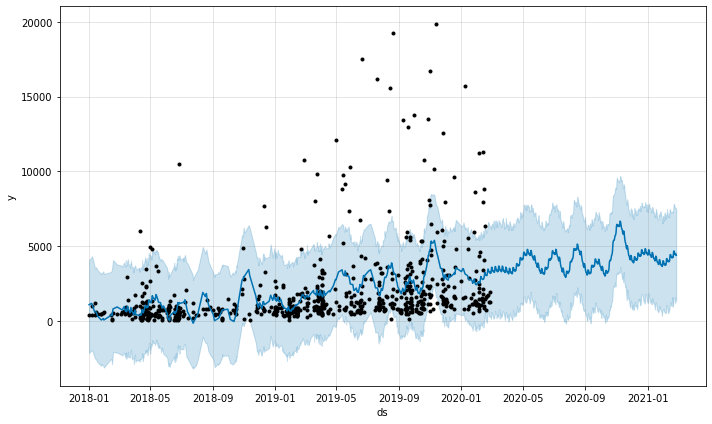

In [137]:
#Plot Forecast of Impressions for Promotional Posts
forecast_promo_impr_plot = m_promo_impr.plot(forecast_promo_impr)

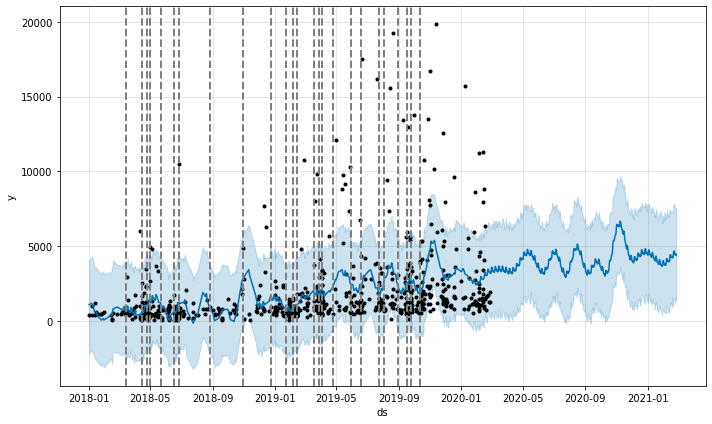

In [138]:
#Plot Changepoints
m_promo_impr.plot(forecast_promo_impr)
a = add_changepoints_to_plot(forecast_promo_impr_plot.gca(), m_promo_impr, forecast_promo_impr)

for cp in m_promo_impr.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

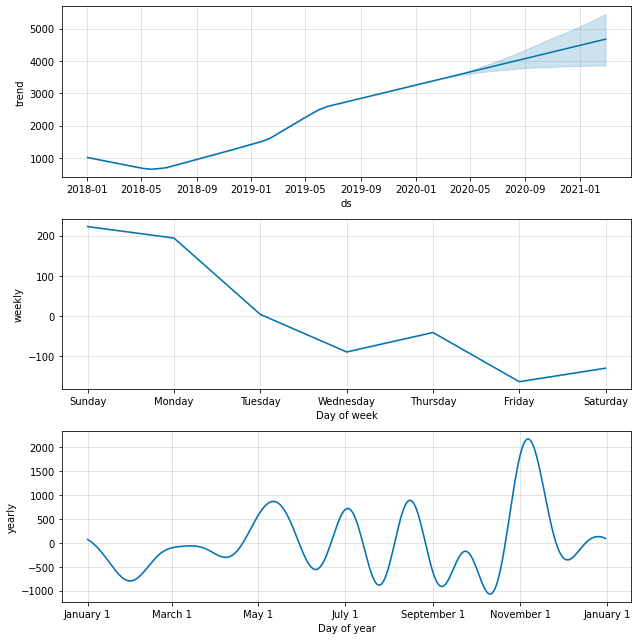

In [139]:
#Components of Forecast
forecast_promo_impr_plot_2 = m_promo_impr.plot_components(forecast_promo_impr)
#Drops on Thursday and on September are based on most recent predictions

In [149]:
#Perform Cross-Validation on Impressions of Promotional Posts
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m_promo_impr, initial='366 days', period='180 days', horizon = '365 days')
df_cv.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-02-27 00:00:00 and 2019-02-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
407,2020-02-21,3878.873324,2403.656085,5374.116288,1643.0,2019-02-27
408,2020-02-23,4443.419780,3028.697120,5940.691908,1734.0,2019-02-27
409,2020-02-25,4495.436296,2952.999428,6033.920112,1251.0,2019-02-27
410,2020-02-26,4755.639260,3222.860228,6256.576989,1943.0,2019-02-27
411,2020-02-27,4506.998999,3041.158224,6034.712929,1222.0,2019-02-27


In [141]:
#Perform Performance Metrics on Impressions of Promotional Posts
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,3.509343e+06,1873.324033,1192.557398,1.219769,0.725721,0.658537
1,32 days,3.595251e+06,1896.114825,1241.300611,1.231587,0.725721,0.634146
2,33 days,3.649561e+06,1910.382439,1269.185111,1.281949,0.781546,0.609756
3,34 days,3.598871e+06,1897.069052,1247.068736,1.197963,0.725721,0.626016
4,35 days,1.543080e+06,1242.207707,1081.147498,1.338029,0.719250,0.544715
...,...,...,...,...,...,...,...
168,359 days,8.706944e+06,2950.753150,2436.633182,1.446646,1.327472,0.219512
169,361 days,8.726626e+06,2954.086394,2441.600187,1.412009,1.327472,0.219512
170,363 days,8.870673e+06,2978.367503,2468.305340,1.466403,1.360848,0.219512
171,364 days,8.929447e+06,2988.218016,2479.699885,1.459287,1.360848,0.219512


## Forecast Click Data for Promotional Posts

In [156]:
#Promotions Clicks DF
promo_click_df = promos_df[["date", "url clicks"]]
promo_click_df.sort_values(by=["url clicks"], ascending=False)

,date,url clicks
7970,2019-11-25,1464.0
9544,2020-1-31,1062.0
5378,2019-8-19,582.0
6066,2019-9-17,354.0
5425,2019-8-20,327.0
...,...,...
2401,2019-1-29,0.0
2427,2019-2-2,0.0
2440,2019-2-5,0.0
2447,2019-2-5,0.0


In [167]:
#Exclude outliers
promo_click_df = promo_click_df[promo_click_df['y'].between(0,200)]

In [168]:
#Promotion Clicks Cleaned
promo_click_df = promo_click_df.rename(columns = {"date": "ds", "url clicks": "y"})
promo_click_df.head()

,ds,y
2,2018-1-2,0.0
10,2018-1-7,0.0
11,2018-1-8,1.0
21,2018-1-13,0.0
22,2018-1-13,0.0


In [225]:
#Instantiate Prophet Class for Promotions-Clicks
m_promo_clicks = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.4)


In [226]:
#Train model on Click Data for Promotions
m_promo_clicks.fit(promo_click_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [227]:
#Generate 365 days into future for x-axis
future_promo_clicks = m_promo_clicks.make_future_dataframe(periods=365)
future_promo_clicks.tail()

,ds
1083,2021-02-22
1084,2021-02-23
1085,2021-02-24
1086,2021-02-25
1087,2021-02-26


In [228]:
#Predict Clicks of Promotional Posts for 1 Year
forecast_promo_clicks = m_promo_clicks.predict(future_promo_clicks)
forecast_promo_clicks[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1083,2021-02-22,3.870308,-12.705423,20.089622
1084,2021-02-23,2.932589,-14.877217,20.400475
1085,2021-02-24,4.169117,-12.219865,21.231166
1086,2021-02-25,4.987896,-9.782852,20.587404
1087,2021-02-26,6.216588,-9.344416,21.967894


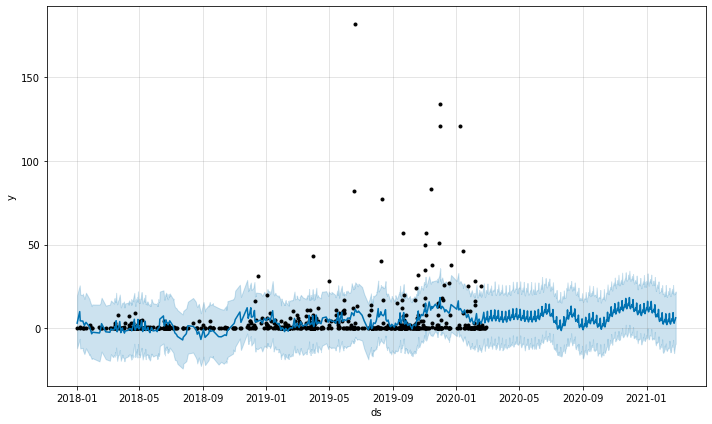

In [229]:
#Plot Forecast of Clicks for Promotional Posts
forecast_promo_clicks_plot = m_promo_clicks.plot(forecast_promo_clicks)

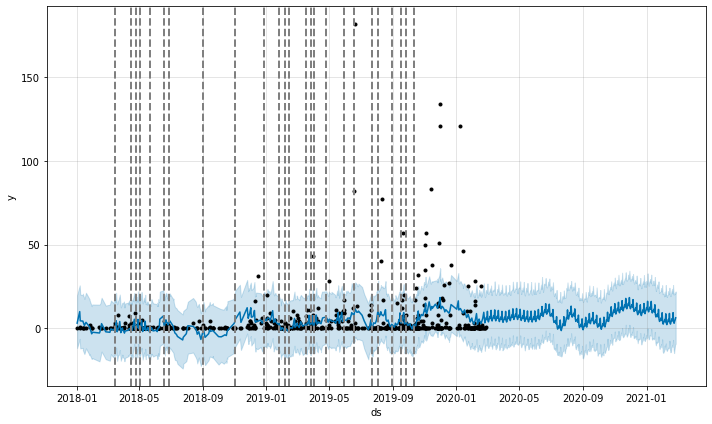

In [232]:
#Plot Changepoints
m_promo_clicks.plot(forecast_promo_clicks)
a = add_changepoints_to_plot(forecast_promo_clicks_plot.gca(), m_promo_clicks, forecast_promo_clicks)

for cp in m_promo_clicks.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

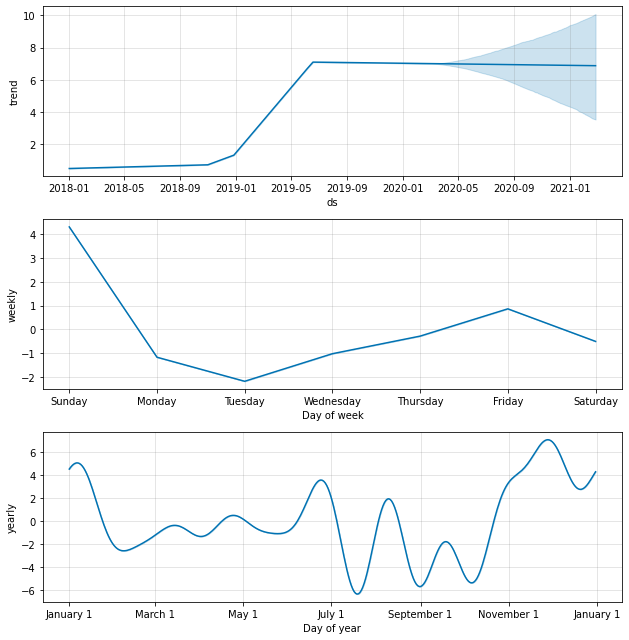

In [233]:
#Components of Forecast
forecast_promo_clicks_plot_2 = m_promo_clicks.plot_components(forecast_promo_clicks)

## Forecast Retweet Data for Promotional Posts

In [234]:
#Create Data Frame for Retweet Data on Promotional Posts
promo_retweet_df = promos_df[["date", "retweets"]]
promo_retweet_df.sort_values(by=["retweets"], ascending=False)

,date,retweets
7970,2019-11-25,97.0
7697,2019-11-13,69.0
5378,2019-8-19,68.0
5425,2019-8-20,39.0
6066,2019-9-17,33.0
...,...,...
906,2018-6-25,0.0
4120,2019-6-18,0.0
916,2018-6-27,0.0
4066,2019-6-17,0.0


In [244]:
#Promotion Retweets DF Cleaned
promo_retweet_df = promo_retweet_df.rename(columns = {"date": "ds", "retweets": "y"})
promo_retweet_df.head()

,ds,y
2,2018-1-2,0.0
10,2018-1-7,0.0
11,2018-1-8,2.0
21,2018-1-13,0.0
22,2018-1-13,0.0


In [253]:
#Exclude outliers
promo_retweet_df = promo_retweet_df[promo_retweet_df['y'].between(0,20)]


In [310]:
#Instantiate Prophet Class for Promotions-Retweets 
m_promo_retweets = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.9)


In [311]:
#Train model on Retweet Data for Promotions
m_promo_retweets.fit(promo_retweet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [312]:
#Generate 365 days into future for x-axis
future_promo_retweets = m_promo_retweets.make_future_dataframe(periods=365)
future_promo_retweets.tail()

,ds
1079,2021-02-22
1080,2021-02-23
1081,2021-02-24
1082,2021-02-25
1083,2021-02-26


In [313]:
#Predict Retweets of Promotional Posts for 1 Year
forecast_promo_retweets = m_promo_retweets.predict(future_promo_retweets)
forecast_promo_retweets[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1079,2021-02-22,-0.594221,-3.757689,2.614921
1080,2021-02-23,-0.306428,-3.641130,2.987513
1081,2021-02-24,-0.523391,-3.863161,2.820314
1082,2021-02-25,-0.763767,-4.027157,2.596963
1083,2021-02-26,-0.531671,-3.956963,2.680033


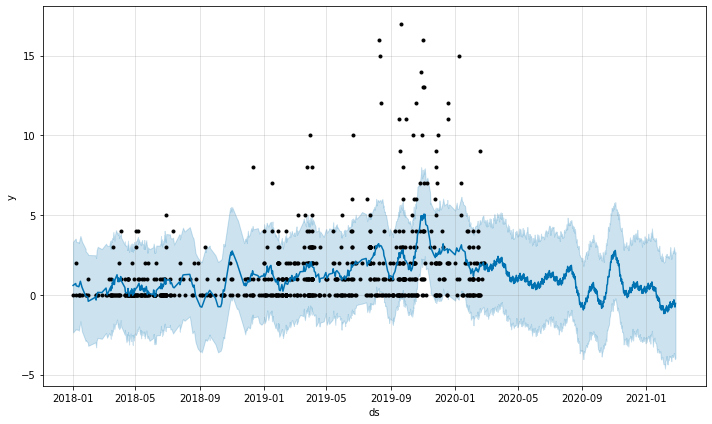

In [314]:
#Plot Forecast of Retweets for Promotional Posts
forecast_promo_retweets_plot = m_promo_retweets.plot(forecast_promo_retweets)

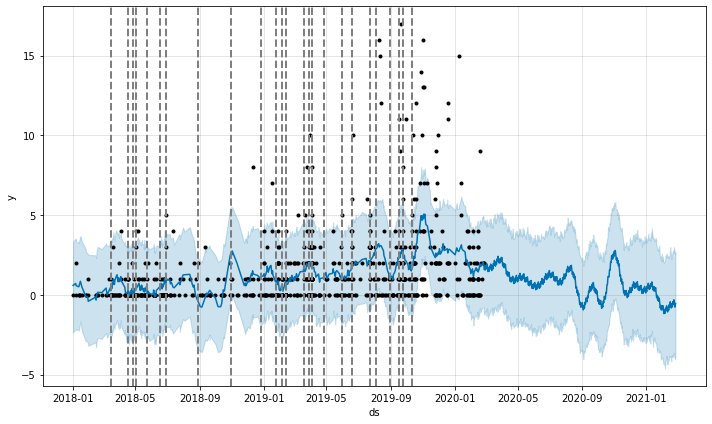

In [315]:
#Plot Changepoints
m_promo_retweets.plot(forecast_promo_retweets)
a = add_changepoints_to_plot(forecast_promo_retweets_plot.gca(), m_promo_retweets, forecast_promo_retweets)

for cp in m_promo_retweets.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

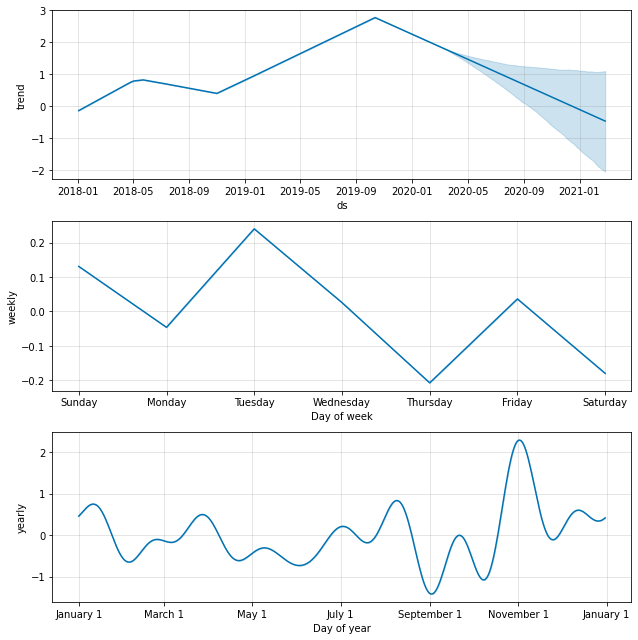

In [316]:
#Components of Forecast
forecast_promo_retweets_plot_2 = m_promo_retweets.plot_components(forecast_promo_retweets)

## Forecast Like Data for Promotional Posts

In [317]:
#Create Data Frame for Like Data on Promotional Posts
promo_like_df = promos_df[["date", "likes"]]
promo_like_df.sort_values(by=["likes"], ascending=False)

,date,likes
7697,2019-11-13,458.0
7970,2019-11-25,448.0
5378,2019-8-19,307.0
6275,2019-9-26,191.0
5425,2019-8-20,152.0
...,...,...
397,2018-4-17,0.0
4278,2019-6-24,0.0
1603,2018-10-6,0.0
245,2018-3-27,0.0


In [318]:
#Promotion Likes DF Cleaned

In [319]:
promo_like_df = promo_like_df.rename(columns = {"date": "ds", "likes": "y"})
promo_like_df.head()

,ds,y
2,2018-1-2,1.0
10,2018-1-7,1.0
11,2018-1-8,10.0
21,2018-1-13,3.0
22,2018-1-13,2.0


In [326]:
#Exclude outliers
promo_like_df = promo_like_df[promo_like_df['y'].between(0,100)]


In [362]:
#Instantiate Prophet Class for Promotions-Likes
m_promo_likes = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.8)

In [363]:
#Train model on Like Data for Promotions
m_promo_likes.fit(promo_like_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [364]:
#Generate 365 days into future for x-axis
future_promo_likes = m_promo_likes.make_future_dataframe(periods=365)
future_promo_likes.tail()

,ds
1082,2021-02-22
1083,2021-02-23
1084,2021-02-24
1085,2021-02-25
1086,2021-02-26


In [365]:
#Predict Likes of Promotional Posts for 1 Year
forecast_promo_likes = m_promo_likes.predict(future_promo_likes)
forecast_promo_likes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1082,2021-02-22,23.826508,10.422278,38.496807
1083,2021-02-23,23.243833,9.481218,37.910210
1084,2021-02-24,23.410252,8.368181,37.760572
1085,2021-02-25,22.857629,9.596410,36.759979
1086,2021-02-26,23.238858,7.708793,36.362755


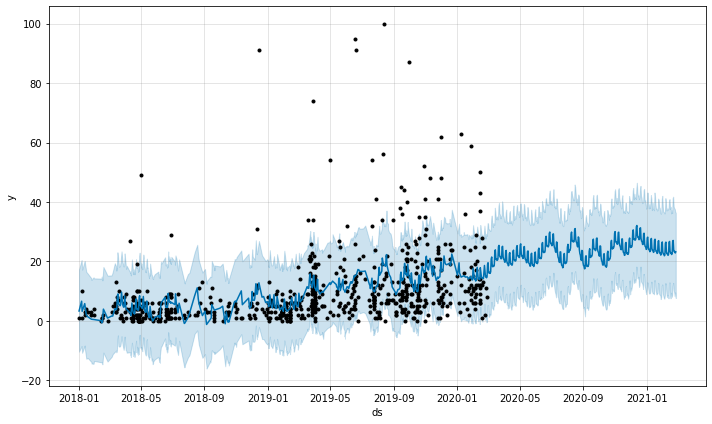

In [366]:
#Plot Forecast of Likes for Promotional Posts
forecast_promo_likes_plot = m_promo_likes.plot(forecast_promo_likes)

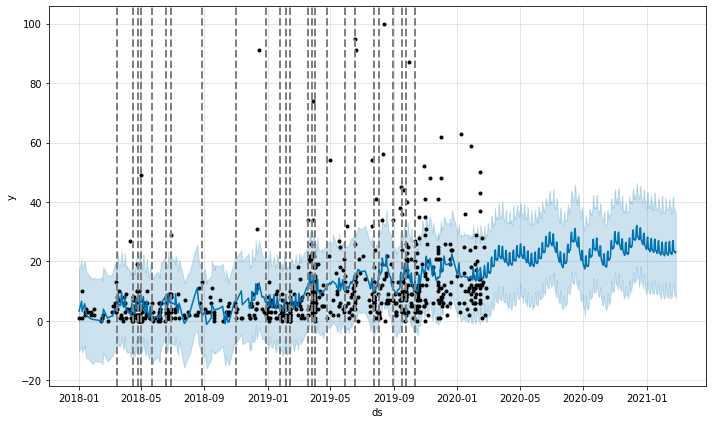

In [367]:
#Plot Changepoints
m_promo_likes.plot(forecast_promo_likes)
a = add_changepoints_to_plot(forecast_promo_likes_plot.gca(), m_promo_likes, forecast_promo_likes)

for cp in m_promo_retweets.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

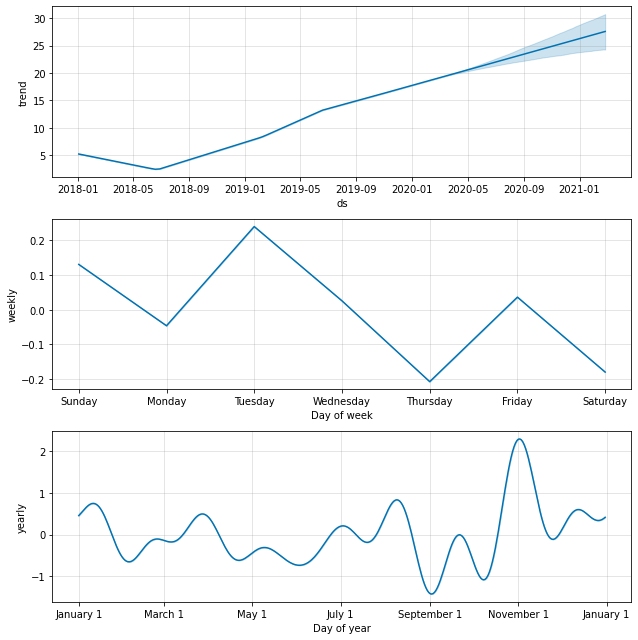

In [368]:
#Components of Forecast
forecast_promo_likes_plot_2 = m_promo_retweets.plot_components(forecast_promo_likes)

## Forecast Reply Data for Promotional Posts

In [375]:
#Create Data Frame for Like Data on Promotional Posts
promo_replies_df = promos_df[["date", "replies"]]
promo_replies_df.sort_values(by=["replies"], ascending=False)

,date,replies
6275,2019-9-26,24.0
6066,2019-9-17,20.0
9450,2020-1-29,18.0
5266,2019-8-14,18.0
6413,2019-9-30,15.0
...,...,...
4132,2019-6-19,0.0
1675,2018-10-17,0.0
1681,2018-10-18,0.0
1756,2018-10-29,0.0


In [376]:
#Promotion Likes DF Cleaned
promo_replies_df = promo_replies_df.rename(columns = {"date": "ds", "replies": "y"})
promo_replies_df.head()

,ds,y
2,2018-1-2,0.0
10,2018-1-7,1.0
11,2018-1-8,0.0
21,2018-1-13,0.0
22,2018-1-13,0.0


In [377]:
#Exclude outliers
promo_replies_df = promo_replies_df[promo_replies_df['y'].between(0,10)]


In [413]:
#Instantiate Prophet Class for Promotions-Likes
m_promo_replies = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.6)

In [414]:
#Train model on Like Data for Promotions
m_promo_replies.fit(promo_replies_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [415]:
#Generate 365 days into future for x-axis
future_promo_replies = m_promo_replies.make_future_dataframe(periods=365)
future_promo_replies.tail()

,ds
1081,2021-02-22
1082,2021-02-23
1083,2021-02-24
1084,2021-02-25
1085,2021-02-26


In [416]:
#Predict Likes of Promotional Posts for 1 Year
forecast_promo_replies = m_promo_replies.predict(future_promo_replies)
forecast_promo_replies[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1081,2021-02-22,1.877186,-0.016475,3.655463
1082,2021-02-23,2.202337,0.380743,4.072638
1083,2021-02-24,1.868317,0.104671,3.757499
1084,2021-02-25,2.101582,0.229650,3.917809
1085,2021-02-26,2.015161,0.254625,3.954040


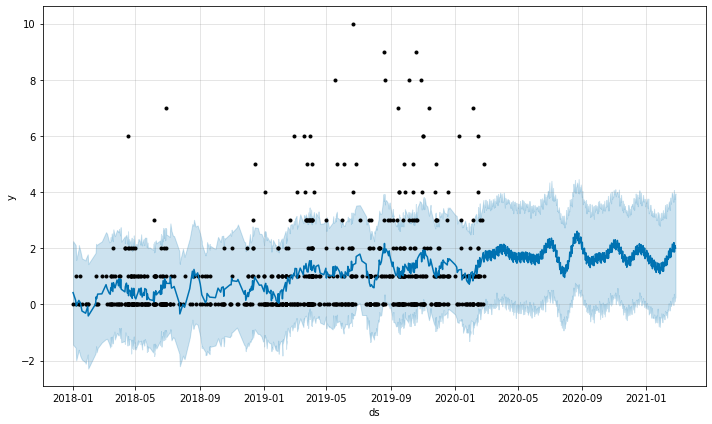

In [417]:
#Plot Forecast of Likes for Promotional Posts
forecast_promo_replies_plot = m_promo_replies.plot(forecast_promo_replies)

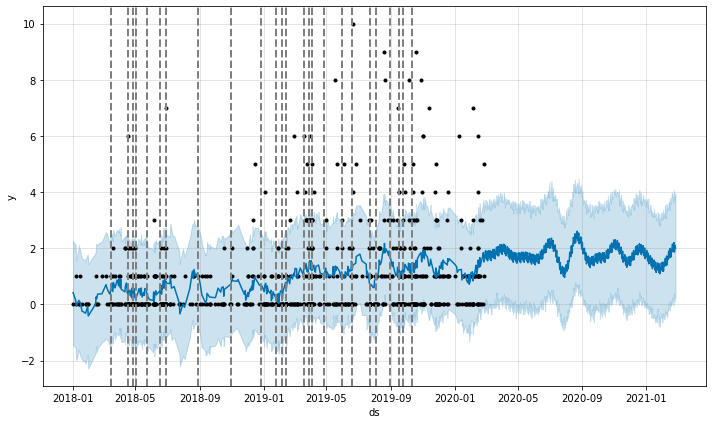

In [418]:
#Plot Changepoints
m_promo_replies.plot(forecast_promo_replies)
a = add_changepoints_to_plot(forecast_promo_replies_plot.gca(), m_promo_replies, forecast_promo_replies)

for cp in m_promo_retweets.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

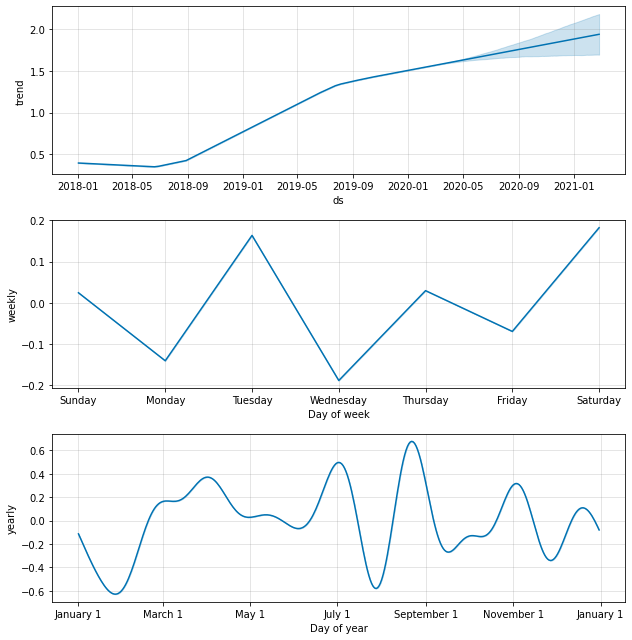

In [419]:
#Components of Forecast
forecast_promo_replies_plot_2 = m_promo_replies.plot_components(forecast_promo_replies)